In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [101]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [102]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [103]:
# Size needs to be converted to categorical
tips['size'] = tips['size'].astype('category')

In [104]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.9 KB


In [105]:
tips.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [106]:
# Check duplicates
tips.duplicated().any()

True

In [107]:
# Drop duplicates
tips.drop_duplicates(inplace=True, ignore_index=False)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [108]:
# Function to find outliers
# using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [109]:
find_outliers_IQR(tips['total_bill'])

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

# Inference:
- We can see that there are no Null values in the dataset 
- There seem to be some duplicates and we will remove them
- There are some outliers in the numerical column of total_bill, we will cap them

In [110]:
# Function to cap the Outliers

In [111]:
def cap_Outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowbound = q1 -(1.5*IQR)
    upbound = q3 +(1.5*IQR)
    df = df.apply(lambda x : lowbound if x < lowbound  else  upbound  if x > upbound else x)
    return df

In [112]:
tips["total_bill"] = cap_Outliers(tips["total_bill"])

In [113]:
find_outliers_IQR(tips['total_bill'])

Series([], Name: total_bill, dtype: float64)

- Outliers are capped 

In [114]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

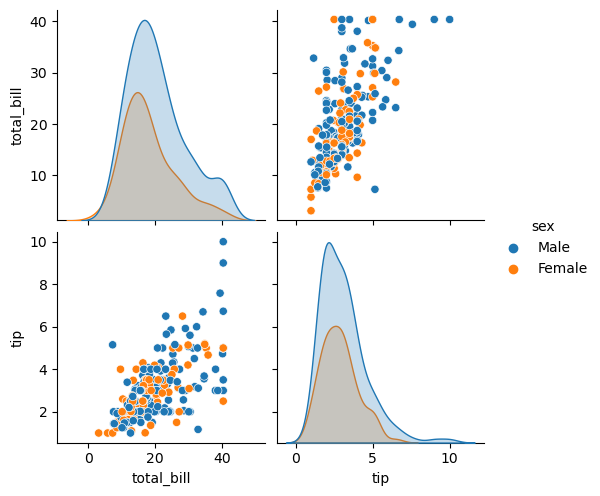

In [115]:
# Check relevance of tips to other columns
sns.pairplot(tips, hue='sex')

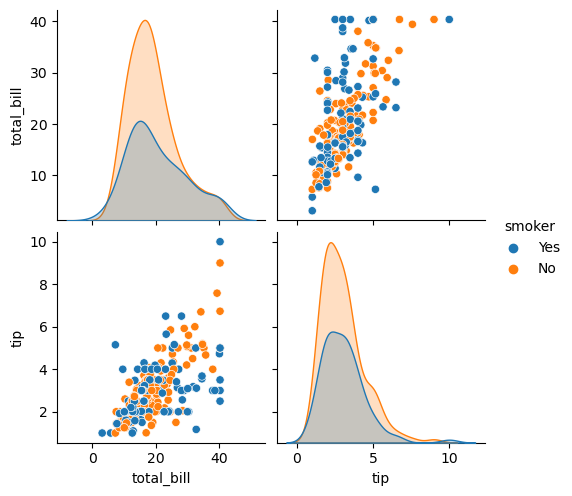

In [116]:
sns.pairplot(tips, hue='smoker')

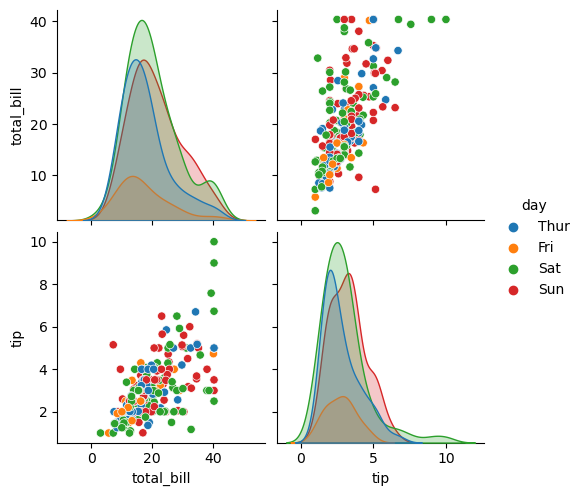

In [117]:
sns.pairplot(tips, hue='day')

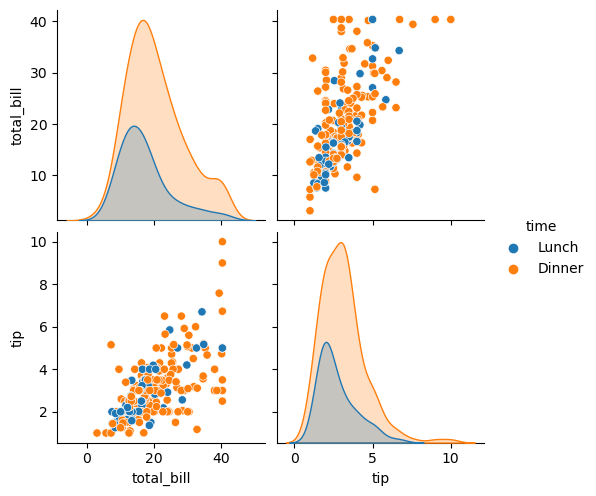

In [118]:
sns.pairplot(tips, hue='time')

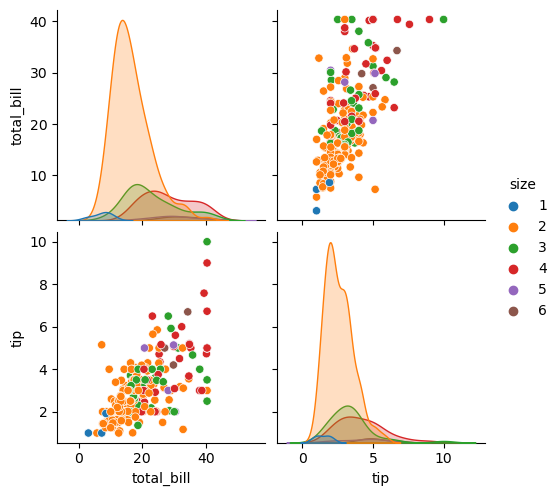

In [119]:
sns.pairplot(tips, hue='size')

In [120]:
# We will consider all the inputs

In [121]:
# Only selecting continous columns
cont_variables = tips.select_dtypes(['float64','int64'])
cont_variables

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [122]:
# From this we will select total_bill as input and tip as output variable
# since output is continous this is a regression task

In [123]:
# Only selecting categorical columns
cat_variables = tips.select_dtypes(['object','category','bool'])
cat_variables

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


In [124]:
# Nominal Categorical Variables - sex, day, time
# Ordinal Categorical columns - smoker, size

In [125]:
# Checking Outliers

<AxesSubplot:>

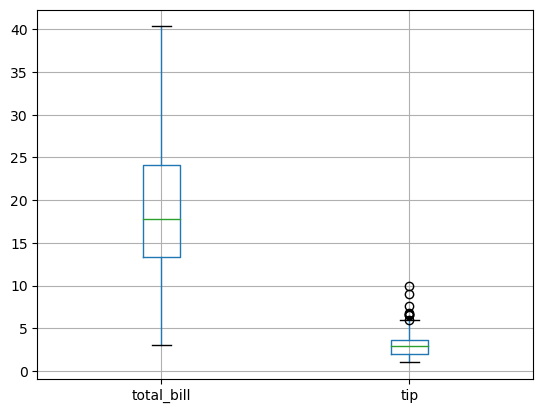

In [126]:
tips.boxplot()

In [127]:
# We see that all the continous variables have outliers on the upper bound
# The scaling is also different so we need to re-scaling
# We can choose 'Robust Scalar' which has low impact of outliers

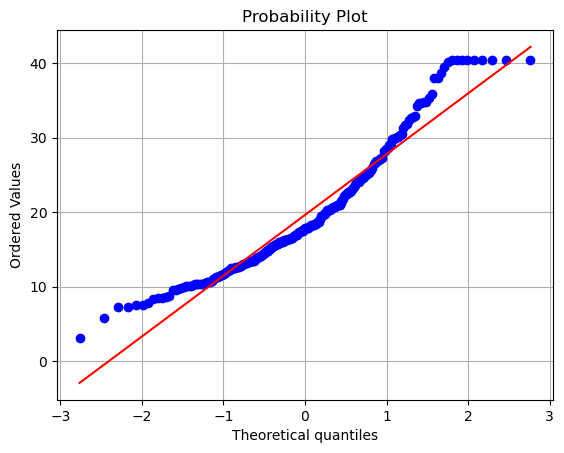

In [128]:
# Check the distributions of continous variables using QQ plot
import scipy
from scipy import stats
stats.probplot(tips['total_bill'],dist = 'norm', plot=plt)
plt.grid()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

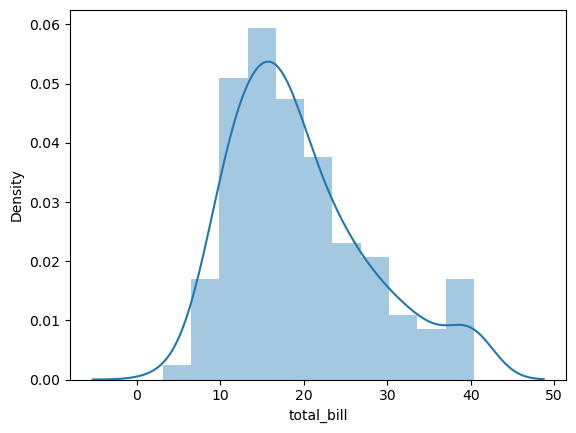

In [129]:
sns.distplot(tips['total_bill'],kde=True)

In [130]:
# Skewness less that -1 and greater than 1 highly skewed
# Skewness between -1 to -0.5 and 0.5 to 1 moderately skewed
# Skewness between -0.5 and 0.5 then symmetrical
tips['total_bill'].skew()

0.8387088961823009

In [131]:
# total_bill does not have a normal distribution and is highly skewed
# we need to use a transformer to bring it to Normal like distribution
# total_bill min value is more than 0 so we can use Box-Cox or Yeo-Johnson

# Steps:
- No missing values - Imputing not needed
- For Continous we need scaling - Robust Scalar
- For Continous we need transformation - Box-cox transformer
- For Categorical Nominal columns we need Encoding - Leave one out encoding
- For Categorical Ordinal columns we need Encoding - Ordinal Encoding


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [133]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [134]:
cont_num_pipeline = Pipeline(steps=[
    ('scaling',RobustScaler()),
    ('transformation',PowerTransformer())])
cat_nom_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder(drop='first'))])
cat_ord_pipeline = Pipeline(steps=[
    ('encoding',OrdinalEncoder())])

In [135]:
# We will segregate the columns
num_cols = ['total_bill']
cat_nom_cols = ['sex', 'day', 'time']
cat_ord_cols = ['smoker','size']
target = ['tip']

In [136]:
col_trans = ColumnTransformer(transformers=[
    ('cont_num_pipeline',cont_num_pipeline,num_cols),
    ('cat_nom_pipeline',cat_nom_pipeline,cat_nom_cols),
    ('cat_ord_pipeline',cat_ord_pipeline,cat_ord_cols)
    ],
    remainder='drop',
    n_jobs=-1)

In [137]:
#  To Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [138]:
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('cont_num_pipeline',
                                 Pipeline(steps=[('scaling', RobustScaler()),
                                                 ('transformation',
                                                  PowerTransformer())]),
                                 ['total_bill']),
                                ('cat_nom_pipeline',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['sex', 'day', 'time']),
                                ('cat_ord_pipeline',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder())]),
                                 ['smoker', 'size'])])

In [139]:
# Splitting Input and Output Variables
X = tips[num_cols+cat_nom_cols+cat_ord_cols]
y = tips[target]

In [140]:
# Split the data
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size= 0.32, 
                                               random_state=23)
xTrain.shape, xTest.shape, len(yTrain),len(yTest)

((165, 6), (78, 6), 165, 78)

In [141]:
# Creating another pipeline to apply Linear Regressor model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', LR)
])

In [142]:
LR_pipeline.fit(xTrain,yTrain)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('cont_num_pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  ['total_bill']),
                                                 ('cat_nom_pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'day', 'time']),
                                                 ('cat_ord_pipeline',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['smoker', 'size'])])),
                ('model', LinearRegression())])

In [143]:
yTrainPred = LR_pipeline.predict(xTrain)

In [144]:
yTestPred = LR_pipeline.predict(xTest)

In [145]:
# Metrics to check Accuracy
# For Regression tasks we cannot use accuracy_score or confusion_matrix
# Instead will use mean_squared_error
# mse = 0 perfect match

from sklearn.metrics import mean_squared_error
mean_squared_error(yTrain, yTrainPred)

1.11381121369787

In [146]:
mean_squared_error(yTest,yTestPred)

1.0874420841498564

In [148]:
# No clarity if the model is good or not

In [149]:
# Let us use R-squared error
from sklearn.metrics import r2_score

In [150]:
r2_score(yTrain, yTrainPred)

0.36559063936164116

In [151]:
r2_score(yTest, yTestPred)

0.5138044037822851

In [ ]:
# The model is not very good.